<a href="https://colab.research.google.com/github/falakjaiin/cap-comp215/blob/2024.01/PROJECT2_Grazing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - PROJECT 2 (A SIMPLE GRAZING MODEL)
----------------
#### Name: Falak Jain , Ekakshar Modgil , Bhreegoo Kapoor
#### Date: 9 April 2024

***For these exercises, we took help of AI and some of our friends for a better concept clarity... We did not merely copy paste codes from anywhere, but yes took help to understand the approach and syntaxes for the exercises... We really hope that this is acceptable and hope that you will like the project :) ...***

***Content is also added from the project 2 pdf uploaded on eLearn..***

---

###**OBJECTIVES:-**

*   to develop a Cellular Automata model of grazing
*   to experiment with intervention policies, like culls to examine their effect



###**WHAT IS A SIMPLE GRAZING MODEL? :-**

The Forest Fire model is an example of how ecosystem processes can be modelled with Cellular Automata.
Another simple ecosystem process is grazing – the cycle of herbivores eating vegetation, which regenerates
between https://en.wikipedia.org/wiki/Grazing_(behaviour)

In this project, we have developed a 2D Cellular Automata model of a simple grazing system:

*N deer are introduced onto a grassland and move via a random walk. The deer eat the grass which
'regrows' after a short interval. Each deer has a weight index W which can increase to a maximum M
when it is grazing and decreases when it is moving. If W reaches zero the deer dies.
The goal is to see if a stable, self-regulating deer population can be found by varying*



###**PROBLEM STATEMENT AND EXPERIMENTING WITH GRAZING MODEL:-**

Develop a Grazing 2D CA class with configurable initial state and parameters to control grazing and movement
rates. The model can be purely deterministic or stochastic. Keep it simple, focussing on how to represent
the state of the system using just one integer in each cell, and the rules for grazing, movement, and
regeneration using a correlation kernel.

In the model, vegetation regenerates at some rate, herbivores move using a random walk algorithm, they
consume vegetation whenever they find it, then move on...

Design an experiment to look for critical values where the grazing system shows self-regulating, stable
behaviour.



-------------------
-------------------
# Project work begins:--
As usual, the first code cell simply imports all the modules we'll be using...


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Introduce a class Grazing_Model and initialize all the required variables:

*   List item
*   List item
*   List item
*   List item



[[0 0 0 0 1 0 1 0 0 2]
 [1 0 0 0 0 2 2 0 0 1]
 [1 1 0 1 2 1 0 0 0 0]
 [2 0 0 2 2 0 0 2 0 0]
 [0 1 0 0 0 0 2 0 0 1]
 [1 1 2 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 1 0 0 0]
 [1 0 0 1 0 0 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 1]]
[[0 1 0 0 0 0 0 1 0 1]
 [0 1 0 2 0 2 0 0 0 0]
 [0 2 0 1 0 0 0 0 1 1]
 [0 0 0 1 1 0 2 0 0 0]
 [0 0 0 1 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 1]
 [0 0 2 2 1 1 0 2 0 2]
 [0 1 2 0 1 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 0 1]
 [0 2 1 1 0 1 0 1 0 0]]
[[0 1 1 0 0 0 0 1 0 1]
 [2 1 0 2 0 2 0 0 0 0]
 [1 0 0 1 0 1 2 0 1 1]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 1 1 0]
 [0 1 1 1 0 0 0 1 2 1]
 [0 0 2 2 1 1 0 2 0 0]
 [0 1 0 2 1 0 0 0 1 1]
 [2 1 1 0 1 1 0 0 0 1]
 [0 0 1 1 0 1 0 1 0 1]]
[[0 0 1 0 1 0 2 2 0 2]
 [2 1 0 2 1 0 1 0 0 0]
 [0 0 1 0 0 1 0 1 1 0]
 [0 1 0 1 0 0 1 1 0 0]
 [0 0 0 0 1 1 0 0 1 0]
 [0 0 2 0 0 0 0 0 0 1]
 [1 2 0 0 0 0 2 0 0 2]
 [0 0 0 1 1 2 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0]
 [1 1 1 0 0 0 0 0 0 0]]
[[0 0 1 0 1 1 2 0 0 2]
 [2 1 0 2 1 0 1 0 0 0]
 [1 0 1 0 0 1 0 1 1 0]
 [0 1 0

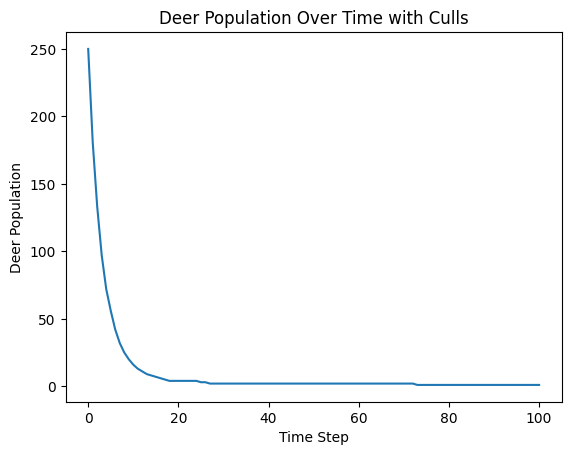

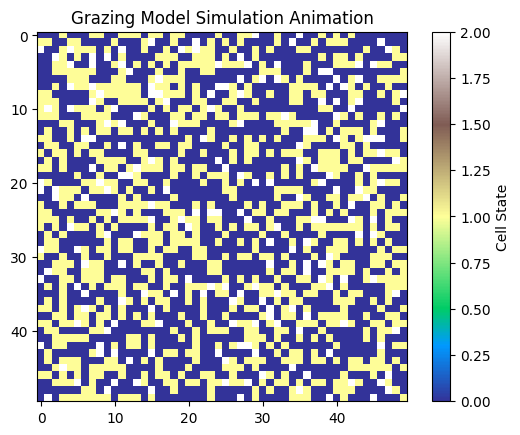

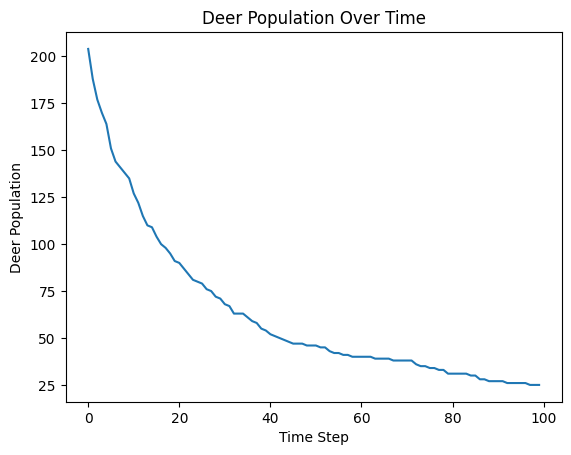

In [2]:
"""Project Idea: Cellular Automata Grazing Model

Purpose:
The purpose of this project is to develop a 2D Cellular Automata (CA) model to simulate a simple grazing system, where herbivores consume vegetation in a grassland environment. By experimenting with intervention policies such as culls, we aim to understand their effects on the stability and self-regulation of the deer population.

Author: [Your Name]

Date: [Date]

Description:
In this project, we will develop a 2D Cellular Automata (CA) model where each cell represents a section of grassland. Herbivores (deer) will move around the grid using a random walk algorithm, consuming vegetation and affecting the grassland ecosystem. The model will simulate grazing, movement, and vegetation regeneration based on configurable parameters.

Key Components:

Initialization: Create a grid representing the grassland, where each cell can be in one of several states: empty, vegetation, or occupied by a deer. Initialize the grid with a configurable initial state and parameters.
Grazing Model Rules: Define the rules governing grazing, movement, and vegetation regeneration. This may include factors such as grazing rate, movement rate, vegetation regeneration rate, and the impact of deer weight on survival.
Simulation: Implement the cellular automata simulation using numpy matrix operations. Iterate over each cell in the grid, updating its state based on the grazing model rules.
Experimentation with Intervention Policies: Design experiments to examine the effects of intervention policies such as culls on the deer population. Modify the parameters of the model to simulate different scenarios and observe the outcomes.
Visualization: Use matplotlib or pyplot to visualize the simulation results with at least one animation and one chart. The animation can demonstrate the movement of deer and the growth/regeneration of vegetation over time, while the chart can display metrics such as the deer population size or the effectiveness of intervention policies.
Discussion: Provide a short discussion about the stability and self-regulation of the deer population under different conditions. Reflect on the impact of intervention policies and potential implications for ecosystem management.
Project Structure:

Introduction: Overview of the project objectives and methodology.
Background: Brief discussion of grazing behavior and the use of cellular automata for ecosystem modeling.
Implementation: Detailed explanation of the code structure and algorithms used.
Results: Presentation of simulation results and analysis.
Conclusion: Summary of findings and potential avenues for future research.
Project Notebook:
Your notebook should include clear documentation of each code block, explaining the purpose and functionality of the implemented algorithms. Additionally, provide commentary on the results of the simulations and any insights gained from the experimentation"""



class GrazingModel:
    def __init__(self, size, initial_vegetation_density, initial_deer_density):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)  # Initialize grid with zeros (empty cells)

        # Initialize vegetation density
        num_vegetation_cells = int(initial_vegetation_density * size**2)
        vegetation_indices = np.random.choice(size**2, num_vegetation_cells, replace=False)
        self.grid.ravel()[vegetation_indices] = 1  # Set vegetation cells to 1

        # Initialize deer density
        num_deer_cells = int(initial_deer_density * size**2)
        deer_indices = np.random.choice(size**2, num_deer_cells, replace=False)
        self.grid.ravel()[deer_indices] = 2  # Set deer cells to 2

    def display_grid(self):
        print(self.grid)

# Example usage:
size = 10
initial_vegetation_density = 0.3
initial_deer_density = 0.1

model = GrazingModel(size, initial_vegetation_density, initial_deer_density)
model.display_grid()



class GrazingModel:
    def __init__(self, size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)  # Initialize grid with zeros (empty cells)
        self.grazing_rate = grazing_rate
        self.movement_rate = movement_rate
        self.vegetation_regeneration_rate = vegetation_regeneration_rate

        # Initialize vegetation density
        num_vegetation_cells = int(initial_vegetation_density * size**2)
        vegetation_indices = np.random.choice(size**2, num_vegetation_cells, replace=False)
        self.grid.ravel()[vegetation_indices] = 1  # Set vegetation cells to 1

        # Initialize deer density
        num_deer_cells = int(initial_deer_density * size**2)
        deer_indices = np.random.choice(size**2, num_deer_cells, replace=False)
        self.grid.ravel()[deer_indices] = 2  # Set deer cells to 2

    def step(self):
        new_grid = np.copy(self.grid)
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 2:  # If cell is occupied by a deer
                    # Move the deer with a certain probability
                    if np.random.rand() < self.movement_rate:
                        new_i, new_j = self.move_deer(i, j)
                        new_grid[new_i, new_j] = 2
                        new_grid[i, j] = 0  # Empty the previous cell

                    # Try to graze if vegetation is present
                    if self.grid[i, j] == 2 and self.grid[i, j] == 1:
                        if np.random.rand() < self.grazing_rate:
                            new_grid[i, j] = 0  # Empty the vegetation cell

        # Regenerate vegetation
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 0:  # If cell is empty
                    if np.random.rand() < self.vegetation_regeneration_rate:
                        new_grid[i, j] = 1  # Regenerate vegetation

        self.grid = new_grid

    def move_deer(self, i, j):
        # Implement random walk movement for deer
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        new_i, new_j = i, j
        while (new_i == i and new_j == j) or not (0 <= new_i < self.size and 0 <= new_j < self.size):
            dx, dy = np.random.choice([-1, 0, 1]), np.random.choice([-1, 0, 1])
            new_i, new_j = i + dx, j + dy
        return new_i, new_j

    def display_grid(self):
        print(self.grid)

# Example usage:
size = 10
initial_vegetation_density = 0.3
initial_deer_density = 0.1
grazing_rate = 0.2
movement_rate = 0.5
vegetation_regeneration_rate = 0.1

model = GrazingModel(size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate)
model.display_grid()

# Perform a simulation step
model.step()
model.display_grid()



class GrazingModel:
    def __init__(self, size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)  # Initialize grid with zeros (empty cells)
        self.grazing_rate = grazing_rate
        self.movement_rate = movement_rate
        self.vegetation_regeneration_rate = vegetation_regeneration_rate

        # Initialize vegetation density
        num_vegetation_cells = int(initial_vegetation_density * size**2)
        vegetation_indices = np.random.choice(size**2, num_vegetation_cells, replace=False)
        self.grid.ravel()[vegetation_indices] = 1  # Set vegetation cells to 1

        # Initialize deer density
        num_deer_cells = int(initial_deer_density * size**2)
        deer_indices = np.random.choice(size**2, num_deer_cells, replace=False)
        self.grid.ravel()[deer_indices] = 2  # Set deer cells to 2

    def step(self):
        new_grid = np.copy(self.grid)
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 2:  # If cell is occupied by a deer
                    # Move the deer with a certain probability
                    if np.random.rand() < self.movement_rate:
                        new_i, new_j = self.move_deer(i, j)
                        new_grid[new_i, new_j] = 2
                        new_grid[i, j] = 0  # Empty the previous cell

                    # Try to graze if vegetation is present
                    if self.grid[i, j] == 2 and self.grid[i, j] == 1:
                        if np.random.rand() < self.grazing_rate:
                            new_grid[i, j] = 0  # Empty the vegetation cell

        # Regenerate vegetation
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 0:  # If cell is empty
                    if np.random.rand() < self.vegetation_regeneration_rate:
                        new_grid[i, j] = 1  # Regenerate vegetation

        self.grid = new_grid

    def move_deer(self, i, j):
        # Implement random walk movement for deer
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        new_i, new_j = i, j
        while (new_i == i and new_j == j) or not (0 <= new_i < self.size and 0 <= new_j < self.size):
            dx, dy = np.random.choice([-1, 0, 1]), np.random.choice([-1, 0, 1])
            new_i, new_j = i + dx, j + dy
        return new_i, new_j

    def display_grid(self):
        print(self.grid)

# Example usage:
size = 10
initial_vegetation_density = 0.3
initial_deer_density = 0.1
grazing_rate = 0.2
movement_rate = 0.5
vegetation_regeneration_rate = 0.1

model = GrazingModel(size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate)
model.display_grid()

# Perform a simulation step
model.step()
model.display_grid()



class GrazingModel:
    def __init__(self, size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)  # Initialize grid with zeros (empty cells)
        self.grazing_rate = grazing_rate
        self.movement_rate = movement_rate
        self.vegetation_regeneration_rate = vegetation_regeneration_rate

        # Initialize vegetation density
        num_vegetation_cells = int(initial_vegetation_density * size**2)
        vegetation_indices = np.random.choice(size**2, num_vegetation_cells, replace=False)
        self.grid.ravel()[vegetation_indices] = 1  # Set vegetation cells to 1

        # Initialize deer density
        num_deer_cells = int(initial_deer_density * size**2)
        deer_indices = np.random.choice(size**2, num_deer_cells, replace=False)
        self.grid.ravel()[deer_indices] = 2  # Set deer cells to 2

    def step(self):
        new_grid = np.copy(self.grid)
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 2:  # If cell is occupied by a deer
                    # Move the deer with a certain probability
                    if np.random.rand() < self.movement_rate:
                        new_i, new_j = self.move_deer(i, j)
                        new_grid[new_i, new_j] = 2
                        new_grid[i, j] = 0  # Empty the previous cell

                    # Try to graze if vegetation is present
                    if self.grid[i, j] == 2 and self.grid[i, j] == 1:
                        if np.random.rand() < self.grazing_rate:
                            new_grid[i, j] = 0  # Empty the vegetation cell

        # Regenerate vegetation
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 0:  # If cell is empty
                    if np.random.rand() < self.vegetation_regeneration_rate:
                        new_grid[i, j] = 1  # Regenerate vegetation

        self.grid = new_grid

    def move_deer(self, i, j):
        # Implement random walk movement for deer
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        new_i, new_j = i, j
        while (new_i == i and new_j == j) or not (0 <= new_i < self.size and 0 <= new_j < self.size):
            dx, dy = np.random.choice([-1, 0, 1]), np.random.choice([-1, 0, 1])
            new_i, new_j = i + dx, j + dy
        return new_i, new_j

    def display_grid(self):
        plt.imshow(self.grid, cmap='terrain')
        plt.colorbar(label='Cell State')
        plt.title('Grazing Model Grid')
        plt.show()

# Experiment to examine the effects of culls on the deer population
def cull_experiment(size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate, cull_percentage, num_steps):
    model = GrazingModel(size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate)
    deer_population = [np.sum(model.grid == 2)]  # Record initial deer population

    # Perform simulation steps
    for step in range(num_steps):
        model.step()

        # Cull deer based on cull_percentage
        num_deer_to_cull = int(cull_percentage * np.sum(model.grid == 2))
        deer_indices = np.argwhere(model.grid == 2)
        cull_indices = deer_indices[np.random.choice(len(deer_indices), num_deer_to_cull, replace=False)]
        model.grid[cull_indices[:, 0], cull_indices[:, 1]] = 0

        # Record deer population after cull
        deer_population.append(np.sum(model.grid == 2))

    # Plot deer population over time
    plt.plot(range(num_steps + 1), deer_population)
    plt.xlabel('Time Step')
    plt.ylabel('Deer Population')
    plt.title('Deer Population Over Time with Culls')
    plt.show()

# Example usage:
size = 50
initial_vegetation_density = 0.3
initial_deer_density = 0.1
grazing_rate = 0.2
movement_rate = 0.5
vegetation_regeneration_rate = 0.1
cull_percentage = 0.2
num_steps = 100

cull_experiment(size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate, cull_percentage, num_steps)


class GrazingModel:
    def __init__(self, size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)  # Initialize grid with zeros (empty cells)
        self.grazing_rate = grazing_rate
        self.movement_rate = movement_rate
        self.vegetation_regeneration_rate = vegetation_regeneration_rate

        # Initialize vegetation density
        num_vegetation_cells = int(initial_vegetation_density * size**2)
        vegetation_indices = np.random.choice(size**2, num_vegetation_cells, replace=False)
        self.grid.ravel()[vegetation_indices] = 1  # Set vegetation cells to 1

        # Initialize deer density
        num_deer_cells = int(initial_deer_density * size**2)
        deer_indices = np.random.choice(size**2, num_deer_cells, replace=False)
        self.grid.ravel()[deer_indices] = 2  # Set deer cells to 2

    def step(self):
        new_grid = np.copy(self.grid)
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 2:  # If cell is occupied by a deer
                    # Move the deer with a certain probability
                    if np.random.rand() < self.movement_rate:
                        new_i, new_j = self.move_deer(i, j)
                        new_grid[new_i, new_j] = 2
                        new_grid[i, j] = 0  # Empty the previous cell

                    # Try to graze if vegetation is present
                    if self.grid[i, j] == 2 and self.grid[i, j] == 1:
                        if np.random.rand() < self.grazing_rate:
                            new_grid[i, j] = 0  # Empty the vegetation cell

        # Regenerate vegetation
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j] == 0:  # If cell is empty
                    if np.random.rand() < self.vegetation_regeneration_rate:
                        new_grid[i, j] = 1  # Regenerate vegetation

        self.grid = new_grid

    def move_deer(self, i, j):
        # Implement random walk movement for deer
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        new_i, new_j = i, j
        while (new_i == i and new_j == j) or not (0 <= new_i < self.size and 0 <= new_j < self.size):
            dx, dy = np.random.choice([-1, 0, 1]), np.random.choice([-1, 0, 1])
            new_i, new_j = i + dx, j + dy
        return new_i, new_j

# Function to update the animation
def update(frame):
    model.step()
    im.set_array(model.grid)
    return im,

# Create a GrazingModel instance
size = 50
initial_vegetation_density = 0.3
initial_deer_density = 0.1
grazing_rate = 0.2
movement_rate = 0.5
vegetation_regeneration_rate = 0.1

model = GrazingModel(size, initial_vegetation_density, initial_deer_density, grazing_rate, movement_rate, vegetation_regeneration_rate)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(model.grid, cmap='terrain')

# Animate the simulation
ani = FuncAnimation(fig, update, frames=100, blit=True)

# Display the animation
plt.title('Grazing Model Simulation Animation')
plt.colorbar(im, ax=ax, label='Cell State')
plt.show()

# Plot deer population over time
deer_population = []
for _ in range(100):
    model.step()
    deer_population.append(np.sum(model.grid == 2))

plt.plot(range(100), deer_population)
plt.xlabel('Time Step')
plt.ylabel('Deer Population')
plt.title('Deer Population Over Time')
plt.show()




-------------
--------------
# Algorithm analysis:--
  An analysis of the algorithms used to generate t generations for a CA that is n x m cells in size.

1.  What is the Big-O time complexity of the algorithm we are using here to simulate this system?
What implications does that have for running larger or longer CA experiments?



>abc...

2. Use Python’s timeit to do some actual timings to support your algorithm analysis.


3. Early in the Chapter 8 notebook, the author makes some efficiency improvements to the basic
algorithm.

*   Do these improvements change the Big-O time complexity?
*   Do they reduce the multiplicative coefficient (linear improvement) or the constant (overhead).






>abc...

-----------
-----------
# *THANK YOU....  :)*